In [1]:
#!pip install torch
import torch

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data=np.loadtxt("perceptron_toydata.txt", delimiter='\t')
X=data[:,:2]
y=data[:,2]
y=y.astype(np.int32)
print("X: ",X[:5])
print("y: ",y[:5])

print("labels count: ", np.bincount(y))
print("X shape: ", X.shape)
print("y shape: ", y.shape)
indices=np.random.RandomState(seed=42).permutation(len(y))
X_shuffle,y_shuffle=X[indices],y[indices]
print("X: ",X_shuffle[:5])
print("y: ",y_shuffle[:5])

X:  [[ 0.77 -1.14]
 [-0.33  1.44]
 [ 0.91 -3.07]
 [-0.37 -1.91]
 [-1.84 -1.13]]
y:  [0 0 0 0 0]
labels count:  [50 50]
X shape:  (100, 2)
y shape:  (100,)
X:  [[ 1.    0.46]
 [ 1.59  1.25]
 [ 0.51  2.44]
 [-2.26  0.01]
 [-3.2  -0.22]]
y:  [1 1 1 0 0]


In [14]:
X_train,X_test=X_shuffle[:70],X_shuffle[70:]
y_train,y_test=y_shuffle[:70],y_shuffle[70:]
mu_train, sigma_train=X_train.mean(axis=0),X_train.std(axis=0)
mu_test, sigma_test=X_test.mean(axis=0),X_test.std(axis=0)

X_train=(X_train-mu_train)/sigma_train
X_test=(X_test-mu_test)/sigma_test

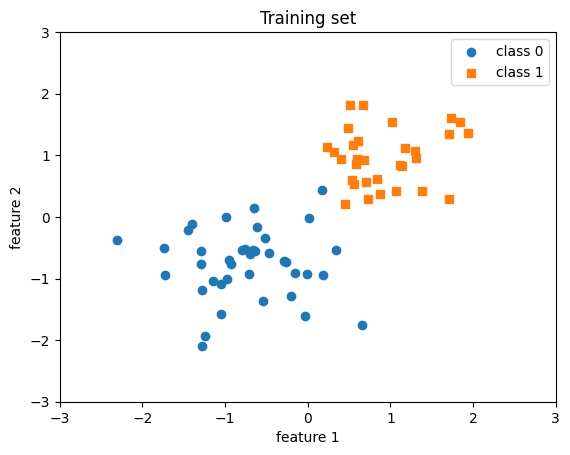

In [15]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

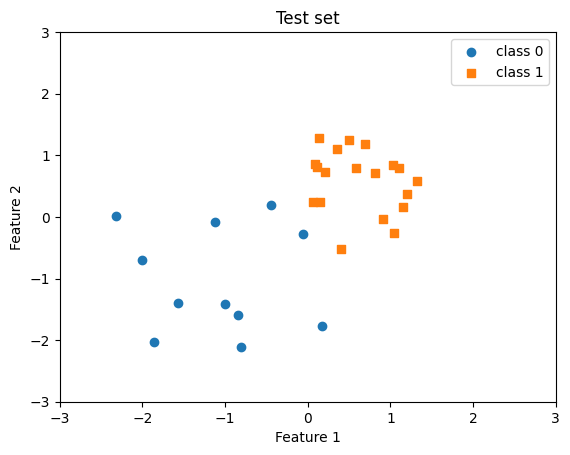

In [16]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [25]:
#check for device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [26]:
gpu_name = torch.cuda.get_device_name(0)
gpu_name

'NVIDIA GeForce MX250'

In [ ]:
class Perceptron():
    def __init__(self, num_features=2):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x_train, y_train, epochs=5):
        if type(x_train) != "torch.Tensor":
            X = torch.tensor(X_train, dtype=torch.float32)
        else:
            X=x_train
        if type(y_train) != "torch.Tensor":
            y = torch.tensor(y_train, dtype=torch.float32, device=device)
        else:
            y=y_train

        for _ in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(X[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * X[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x_test, y_test):
        if type(x_test) != "torch.Tensor":
            X = torch.tensor(x_test, dtype=torch.float32)
        else:
            X=x_test
        if type(y_test) != "torch.Tensor":
            y = torch.tensor(y_test, dtype=torch.float32, device=device)
        else:
            y=y_test
        predictions = self.forward(X).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [66]:
percep_obj=Perceptron()
percep_obj.train(X_train,y_train,5)

In [67]:
print("Weight: ",percep_obj.weights)
print("bias: ",percep_obj.bias)


Weight:  tensor([[1.8890],
        [1.4958]])
bias:  tensor([-1.])


In [68]:
test_acc=percep_obj.evaluate(X_test,y_test)

In [69]:
print("Accuracy: ",test_acc)

Accuracy:  tensor(0.9000)
